<a href="https://www.kaggle.com/code/balabaskar/titanic-survivors-80-accuracy-lr-rf-random?scriptVersionId=95876091" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This notebook demonstrates the attempt to predict whether the passenger survived or not in 
# the Titanic event using Kaggle Titanic dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

In [3]:
# Check the shape of train and test files
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Let us combine both train and test for data cleaning & preparation for modeling
data = pd.concat([train,test],axis=0,ignore_index=True,sort=False)
data.shape

(1309, 12)

In [7]:
# Check for proper concatenation is done
data.shape[0] == train.shape[0]+ test.shape[0]

True

In [8]:
data['dtype'] = np.where((data['Survived']== 0.0) | (data['Survived']== 1.0) ,'train','test')
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dtype
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [9]:
data['dtype'].value_counts()

train    891
test     418
Name: dtype, dtype: int64

In [10]:
# Adding the column names to the list
columns = data.columns.to_list()
# Checking the number of cells without values and datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  dtype        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


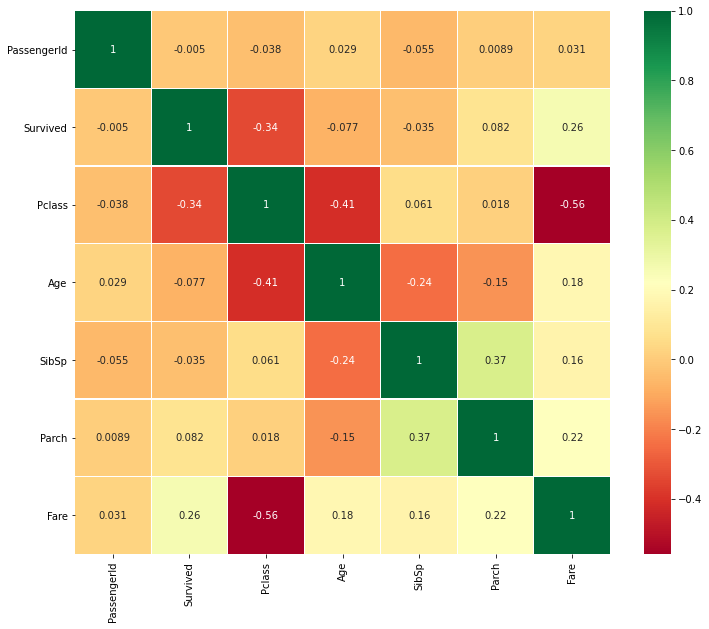

In [11]:
# Create Correlation matrix for all variables
corr = data.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

# **Data preparation**

Following are the steps to follow for data preparation:

1. Find the missing values in the dataset and do imputation/drop those missing values
2. Check for outliers in the dataset and do required transformation on dataset
3. Encode the categorical variables into dummy variables for model building
4. Do univariate & bivariate analysis with dependant variables

In [12]:
# Check for total no. of cells with missing values
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype             0
dtype: int64

1. Survived column shows 418 missing values, which are from test data
2. Age has 263 missing values
3. Cabin has 1014 missing values
4. Fare has 1 value missing and Embarked has 2 value missing

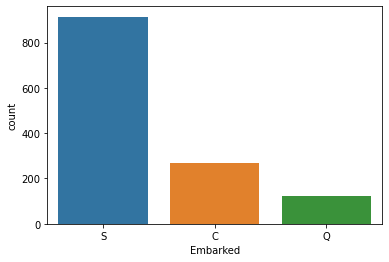

In [13]:
#Filling the missing value for Fare & Embarked

sns.countplot(x='Embarked',data=data)
plt.show()

In [14]:
table = pd.crosstab(data['Survived'].dropna(),data['Embarked'])
table

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


In [15]:
import statsmodels.api as sm
import scipy as sp

value, p ,dof ,expected = sp.stats.chi2_contingency(table)

if p <= 0.05:
    print('Reject H0: Dependant')
else:
    print('Fail to reject H0: Independant')

Reject H0: Dependant


From the above Chi-Square test, it is evident that Embarked and Survivors are statistically dependent to each other. And the expected values for each combination is given by chiSquare test. Let us impute the missing values based on suitable combination, where still the expected values are not met.

In [16]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dtype
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,train
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,train


Above missing values show that both the persons has survived, and from the expected table, if the passenger is survived, the expected value doesnt meet for level C, as others are already achieved. Thus, filling with level C is statiscally correct.

In [17]:
data['Embarked'].fillna('Q',inplace=True)

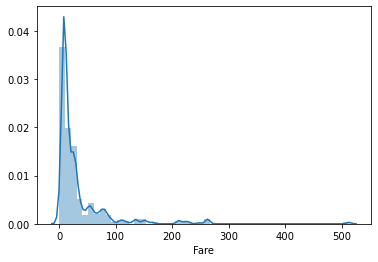

In [18]:
# Fare values
sns.distplot(data['Fare'].dropna())
plt.show()

As it is seen, the fare values are highly skewed to the right. We can impute median value for the missing one. We need to do transformation on Fare price to make it normally distributed for model, which will be done later.

In [19]:
# Filling NaN with median values
data['Fare'].fillna(np.median(data['Fare'].dropna()),inplace=True)

In [20]:
# Filling zero values with median values as fare price cannot zero
data['Fare'].replace(0,np.median(data['Fare']),inplace=True)

Before impute the missing values for Age, let us encode the catergorical variables into dummy variables.

In [21]:
import re
data['Name'] = data['Name'].apply(lambda x: re.sub('[^A-Za-z. ]+', '',x))
data['Name'] = data['Name'].apply(lambda x: x.lower())

In [22]:
words = pd.DataFrame(data['Name'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0))
words = words[0].sort_values(ascending=False)
words.head(5)

mr.        757.0
miss.      260.0
mrs.       197.0
william     87.0
john        72.0
Name: 0, dtype: float64

In [23]:
# Encoding the gender sex variable
data['Sex'] = np.where(data['Sex']=='male',1,0)

In [24]:
# Get dummy codes for Embarked variables
dummy = pd.get_dummies(data['Embarked'])
dummy.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In order to use these dummy code variables, we need to drop one column as we already have the information of third column in combination of first 2 columns, thus column C is dropped for ease of model building.

In [25]:
dummy.drop(columns='Q',inplace=True)
dummy.rename(columns={'C':'Embarked_C','S':'Embarked_S'},inplace=True)
dummy.head()

,Embarked_C,Embarked_S
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [26]:
# Adding the dummy variables and dropping the original column from data

data = pd.merge(data,dummy,left_index=True,right_index=True)
data.drop(columns='Embarked',inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,dtype,Embarked_C,Embarked_S
0,1,0.0,3,braund mr. owen harris,1,22.0,1,0,A/5 21171,7.2500,NaN,train,0,1
1,2,1.0,1,cumings mrs. john bradley florence briggs thayer,0,38.0,1,0,PC 17599,71.2833,C85,train,1,0
2,3,1.0,3,heikkinen miss. laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,train,0,1
3,4,1.0,1,futrelle mrs. jacques heath lily may peel,0,35.0,1,0,113803,53.1000,C123,train,0,1
4,5,0.0,3,allen mr. william henry,1,35.0,0,0,373450,8.0500,NaN,train,0,1


In [27]:
# Impute Age group for missing values using Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10,random_state=0,verbose=1)
imp.fit(data.drop(columns=['PassengerId','Survived','Name','Parch','Ticket','Cabin','dtype']))

[IterativeImputer] Completing matrix with shape (1309, 7)
[IterativeImputer] Change: 32.76332683966872, scaled tolerance: 0.5123292 
[IterativeImputer] Change: 0.0, scaled tolerance: 0.5123292 
[IterativeImputer] Early stopping criterion reached.


IterativeImputer(random_state=0, verbose=1)

In [28]:
drop_col = ['PassengerId','Survived','Name','Parch','Ticket','Cabin','dtype']
data_imp = pd.DataFrame(imp.transform(data.drop(columns=drop_col)))
data_imp

[IterativeImputer] Completing matrix with shape (1309, 7)


,0,1,2,3,4,5,6
0,3.0,1.0,22.000000,1.0,7.2500,0.0,1.0
1,1.0,0.0,38.000000,1.0,71.2833,1.0,0.0
2,3.0,0.0,26.000000,0.0,7.9250,0.0,1.0
3,1.0,0.0,35.000000,1.0,53.1000,0.0,1.0
4,3.0,1.0,35.000000,0.0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...
1304,3.0,1.0,27.099140,0.0,8.0500,0.0,1.0
1305,1.0,0.0,39.000000,0.0,108.9000,1.0,0.0
1306,3.0,1.0,38.500000,0.0,7.2500,0.0,1.0
1307,3.0,1.0,27.099140,0.0,8.0500,0.0,1.0


In [29]:
data['Age_imp'] = abs(data_imp[2])
age_imp = np.median(data.loc[(data['Age'].dropna()>18.0)&(data['Sex']==1),'Age'])

In [30]:
# Creating user defined function to impute age value wherever it is missing
def a(x):
    if (np.isnan(x['Age'])) & (x['Age_imp'] < 18.0):
        return age_imp
    elif (np.isnan(x['Age'])) & (x['Age_imp'] >= 18.0):
        return x['Age_imp']
    else:
        return x['Age']
    
data['Age_x'] = data.apply(a,axis=1)
data.drop(columns=['Age','Age_imp'],inplace=True)
data.rename(columns={'Age_x':'Age'},inplace= True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,dtype,Embarked_C,Embarked_S,Age
0,1,0.0,3,braund mr. owen harris,1,1,0,A/5 21171,7.2500,NaN,train,0,1,22.0
1,2,1.0,1,cumings mrs. john bradley florence briggs thayer,0,1,0,PC 17599,71.2833,C85,train,1,0,38.0
2,3,1.0,3,heikkinen miss. laina,0,0,0,STON/O2. 3101282,7.9250,NaN,train,0,1,26.0
3,4,1.0,1,futrelle mrs. jacques heath lily may peel,0,1,0,113803,53.1000,C123,train,0,1,35.0
4,5,0.0,3,allen mr. william henry,1,0,0,373450,8.0500,NaN,train,0,1,35.0


# Feature Engineering

1. Let us first create the passenger travelled along with family or alone
2. Calculate the no.of family members travelled in the ship along with the passenger, if they travelled with family
3. Change of Sex, based on the name that contains Mr. , Mrs. , Miss.

In [31]:
# Create variable IsAlone
data['IsAlone'] = np.where(data['SibSp']+data['Parch'] == 0,1,0)
data['Fam_size'] = np.where(data['IsAlone'] == 0,data['SibSp']+data['Parch']+1,1)

In [32]:
data['Fam_size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Fam_size, dtype: int64

In [33]:
# Creating user defined function to assign Gender based on the age group
def f(x):
    if x['Age'] <= 15.0:
        return 'Children'
    elif (x['Age'] > 15.0) & (x['Sex'] == 1):
        return 'Adult-Male'
    else:
        return 'Adult-Female'

data['Gender'] = data.apply(f,axis=1)

# Lookup the frequency distribution table between gender and passenger class 
pd.crosstab(data['Gender'],data['Pclass'])

Pclass,1,2,3
Gender,,,
Adult-Female,141,90,179
Adult-Male,174,159,451
Children,8,28,79


In [34]:
# 2 more user defined functions to assign each passenger with time of boarding
# based on which the passenger class got filled
def g(x):
    if (x['Embarked_S'] == 1) & (x['Embarked_C'] == 0):
        return 'first'
    elif (x['Embarked_S'] == 0) & (x['Embarked_C'] == 1):
        return 'second'
    else:
        return 'third'

def h(x):
    if x['Pclass'] == 1:
        return 'upper'
    elif x['Pclass'] == 2:
        return 'middle'
    else:
        return 'lower'
    
data['Boarding'] = data.apply(g,axis=1) +'-' + data.apply(h,axis=1)

In [35]:
levels = pd.DataFrame(data['Boarding'].value_counts())
levels

,Boarding
first-lower,495
first-middle,242
first-upper,177
second-upper,141
third-lower,113
second-lower,101
second-middle,28
third-middle,7
third-upper,5


In [36]:
level_list = levels.index.to_list()
level_dict = {'lower':['Deck_G','Deck_F','Deck_E'],
              'middle':['Deck_E','Deck_D'],
              'upper':['Deck_C','Deck_B','Deck_A']}
level_list

['first-lower',
 'first-middle',
 'first-upper',
 'second-upper',
 'third-lower',
 'second-lower',
 'second-middle',
 'third-middle',
 'third-upper']

In [37]:
level_dict.get(level_list[0].split('-')[1])

Fare1 = pd.DataFrame(columns=None)

for level in level_list:
    Fare = pd.DataFrame(data[data['Boarding'] == level]['Fare'])
    deck = level_dict.get(level.split('-')[1])
    Fare['Deck'] = pd.cut(np.array(Fare['Fare']),len(deck), labels=deck)
    Fare1 = pd.concat([Fare1,Fare],axis=0,sort=False)

In [38]:
Fare1['Deck'].value_counts()

Deck_G    581
Deck_E    292
Deck_C    258
Deck_F     85
Deck_B     44
Deck_D     28
Deck_A     21
Name: Deck, dtype: int64

In [39]:
# Deck class is assigned for each passenger based on the fair price,embarked station,Pclass
Fare1.head()

,Fare,Deck
0,7.2500,Deck_G
2,7.9250,Deck_G
4,8.0500,Deck_G
7,21.0750,Deck_G
8,11.1333,Deck_G


In [40]:
# Merging this data with original dataframe
data = pd.merge(data,Fare1['Deck'],left_index=True,right_index=True)
data.drop(columns=['Name','Ticket','Cabin','Boarding'],inplace=True) # remove unwanted columns
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,dtype,Embarked_C,Embarked_S,Age,IsAlone,Fam_size,Gender,Deck
0,1,0.0,3,1,1,0,7.2500,train,0,1,22.0,0,2,Adult-Male,Deck_G
1,2,1.0,1,0,1,0,71.2833,train,1,0,38.0,0,2,Adult-Female,Deck_C
2,3,1.0,3,0,0,0,7.9250,train,0,1,26.0,1,1,Adult-Female,Deck_G
3,4,1.0,1,0,1,0,53.1000,train,0,1,35.0,0,2,Adult-Female,Deck_C
4,5,0.0,3,1,0,0,8.0500,train,0,1,35.0,1,1,Adult-Male,Deck_G


In [41]:
# Create dummy variables for categorical values
dummy1 = pd.get_dummies(data['Gender'])
dummy1.drop(columns='Children',inplace=True)

dummy2 = pd.get_dummies(data['Deck'])
dummy2.drop(columns='Deck_A',inplace=True)

dummies = pd.merge(dummy1,dummy2,left_index=True,right_index=True)
data = pd.merge(data,dummies,left_index=True,right_index=True)

data.drop(columns=['Gender','Deck'],inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,dtype,Embarked_C,Embarked_S,...,IsAlone,Fam_size,Adult-Female,Adult-Male,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
0,1,0.0,3,1,1,0,7.2500,train,0,1,...,0,2,0,1,0,0,0,0,0,1
1,2,1.0,1,0,1,0,71.2833,train,1,0,...,0,2,1,0,0,1,0,0,0,0
2,3,1.0,3,0,0,0,7.9250,train,0,1,...,1,1,1,0,0,0,0,0,0,1
3,4,1.0,1,0,1,0,53.1000,train,0,1,...,0,2,1,0,0,1,0,0,0,0
4,5,0.0,3,1,0,0,8.0500,train,0,1,...,1,1,0,1,0,0,0,0,0,1


In [42]:
# Box Cox transformation for Fare value, since it is highly skewed
from sklearn.preprocessing import power_transform

data['Fare'] = power_transform(np.array(data['Fare']).reshape(-1,1),method='box-cox')
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,dtype,Embarked_C,Embarked_S,...,IsAlone,Fam_size,Adult-Female,Adult-Male,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
0,1,0.0,3,1,1,0,-1.232748,train,0,1,...,0,2,0,1,0,0,0,0,0,1
1,2,1.0,1,0,1,0,1.370964,train,1,0,...,0,2,1,0,0,1,0,0,0,0
2,3,1.0,3,0,0,0,-1.061530,train,0,1,...,1,1,1,0,0,0,0,0,0,1
3,4,1.0,1,0,1,0,1.184980,train,0,1,...,0,2,1,0,0,1,0,0,0,0
4,5,0.0,3,1,0,0,-1.032259,train,0,1,...,1,1,0,1,0,0,0,0,0,1


In [43]:
# Split the train and test to build ML models
train_new = data[data['dtype']=='train'].drop(columns='dtype')
test_new = data[data['dtype']=='test'].drop(columns=['dtype','Survived'])
test_new.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_S,Age,IsAlone,Fam_size,Adult-Female,Adult-Male,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
891,892,3,1,0,0,-1.084446,0,0,34.5,1,1,0,1,0,0,0,0,0,1
892,893,3,0,1,0,-1.302502,0,1,47.0,0,2,1,0,0,0,0,0,0,1
893,894,2,1,0,0,-0.703831,0,0,62.0,1,1,0,1,0,0,0,1,0,0
894,895,3,1,0,0,-0.898307,0,1,27.0,1,1,0,1,0,0,0,0,0,1
895,896,3,0,1,1,-0.326928,0,1,22.0,0,3,1,0,0,0,0,0,0,1


# Predictive modeling

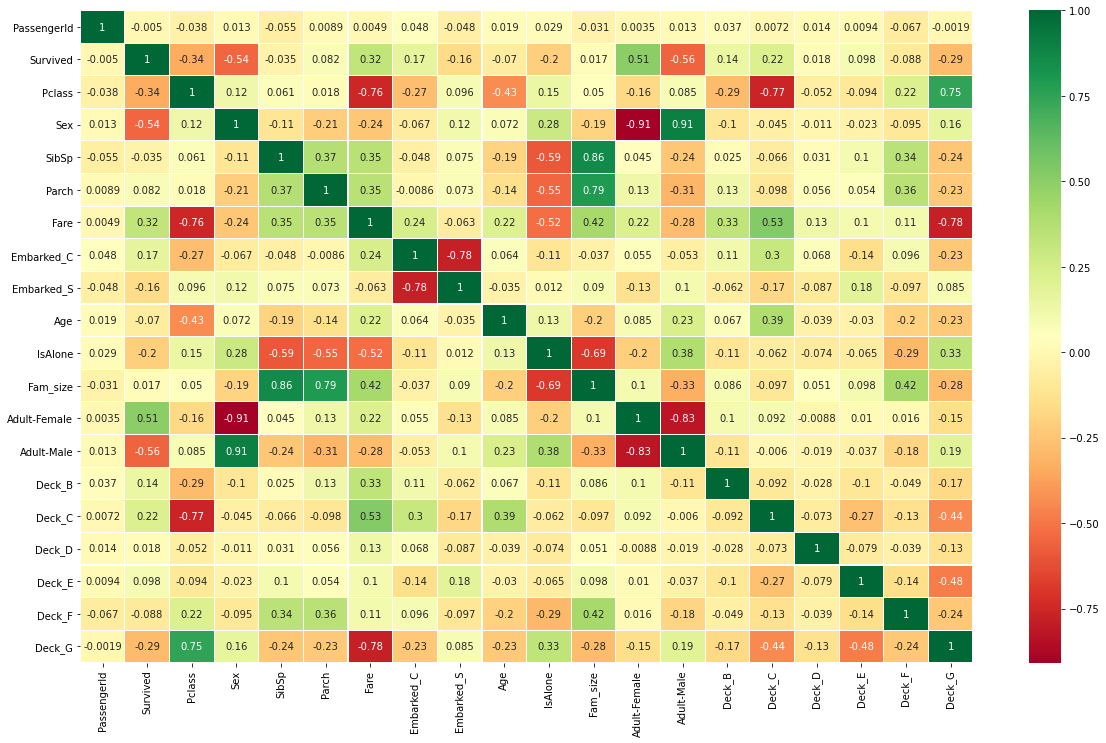

In [44]:
corr_n = data.corr()

sns.heatmap(corr_n,annot=True,cmap='RdYlGn',linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [45]:
# Split the dataset

X = train_new.loc[:,train_new.columns != 'Survived'].copy()
y = train_new.loc[:,train_new.columns == 'Survived'].copy()

X.drop(columns='PassengerId',inplace=True)

In [46]:
# Run the logistic regression model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score,plot_roc_curve

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.406512
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      873
Method:                           MLE   Df Model:                           17
Date:                Tue, 17 May 2022   Pseudo R-squ.:                  0.3895
Time:                        17:27:56   Log-Likelihood:                -362.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.657e-87
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Pclass           0.5707      0.598      0.955      0.340      -0.601       1.742
Sex             -0.1956

# Logistic regression with GridSearch

In [47]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1','l2']
C = np.logspace(0,4,10)
hyperparameters = dict(C= C,penalty = penalty)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=0)

lr = LogisticRegression(max_iter=200,solver='liblinear')
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0,scoring='recall')

model_lr = clf.fit(X_train,y_train.values.ravel())
print('Best penalty:',model_lr.best_estimator_.get_params()['penalty'])
print('Best C:', round(model_lr.best_estimator_.get_params()['C'],2))

Best penalty: l2
Best C: 7.74


In [48]:
y_pred_lr = model_lr.predict(X_test)

confusion1 = pd.DataFrame(pd.crosstab(y_test['Survived'],y_pred_lr))
confusion1

col_0,0.0,1.0
Survived,,
0.0,143,25
1.0,24,76


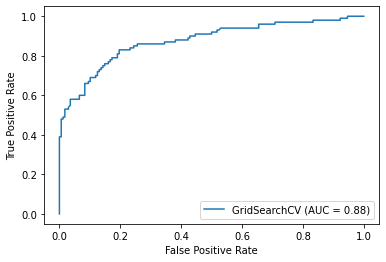

In [49]:
plot_roc_curve(model_lr,X_test,y_test)
plt.show()

In [50]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : {}'.format(round(accuracy_score(y_test,y_pred_lr),2)))
print('Precision Score : {}'.format(round(precision_score(y_test,y_pred_lr),2)))
print('Recall Score : {}'.format(round(recall_score(y_test,y_pred_lr),2)))
print('F1 Score : {}'.format(round(f1_score(y_test,y_pred_lr),2)))

Accuracy Score : 0.82
Precision Score : 0.75
Recall Score : 0.76
F1 Score : 0.76


# Random forest with Randomised search

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=0)

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [53]:
# Getting the best parameters from the randomised search
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [54]:
# Build Random forest model
best_rf = rf_random.best_estimator_

y_pred_rfs = best_rf.predict(X_test)

confusion2 = pd.DataFrame(pd.crosstab(y_test['Survived'],y_pred_rfs))
confusion2

col_0,0.0,1.0
Survived,,
0.0,151,17
1.0,30,70


In [55]:
print('Accuracy Score : {}'.format(round(accuracy_score(y_test,y_pred_rfs),2)))
print('Precision Score : {}'.format(round(precision_score(y_test,y_pred_rfs),2)))
print('Recall Score : {}'.format(round(recall_score(y_test,y_pred_rfs),2)))
print('F1 Score : {}'.format(round(f1_score(y_test,y_pred_rfs),2)))

Accuracy Score : 0.82
Precision Score : 0.8
Recall Score : 0.7
F1 Score : 0.75


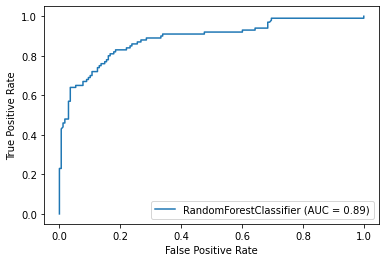

In [56]:
plot_roc_curve(best_rf,X_test,y_test)
plt.show()

In [57]:
# Variable importance table to look for most important variables

var_imp1 = pd.DataFrame({'Variable': X.columns,
                        'Importance':best_rf.feature_importances_}).sort_values('Importance', ascending=False)
var_imp1.head(10)

,Variable,Importance
11,Adult-Male,0.231275
1,Sex,0.156055
7,Age,0.111185
10,Adult-Female,0.109837
4,Fare,0.103783
0,Pclass,0.080263
9,Fam_size,0.053371
17,Deck_G,0.032928
2,SibSp,0.031366
16,Deck_F,0.019321


# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=0)

# Create the model with 100 trees
model_rf = RandomForestClassifier(n_estimators=100, 
                               random_state= 0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model_rf.fit(X_train, y_train.values.ravel())

n_nodes = []
max_depths = []

for ind_tree in model_rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s


Average number of nodes 260
Average maximum depth 16


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [59]:
ytrain_rf_pred = model_rf.predict(X_train)
ytrain_rf_prob = model_rf.predict_proba(X_train)[:, 1]

ytest_rf_pred = model_rf.predict(X_test)
ytest_rf_prob = model_rf.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [60]:
confusion3 = pd.crosstab(y_test['Survived'],ytest_rf_pred)
confusion3

col_0,0.0,1.0
Survived,,
0.0,142,26
1.0,31,69


In [61]:
print('Accuracy Score : {}'.format(round(accuracy_score(y_test,ytest_rf_pred),2)))
print('Precision Score : {}'.format(round(precision_score(y_test,ytest_rf_pred),2)))
print('Recall Score : {}'.format(round(recall_score(y_test,ytest_rf_pred),2)))
print('F1 Score : {}'.format(round(f1_score(y_test,ytest_rf_pred),2)))

Accuracy Score : 0.79
Precision Score : 0.73
Recall Score : 0.69
F1 Score : 0.71


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


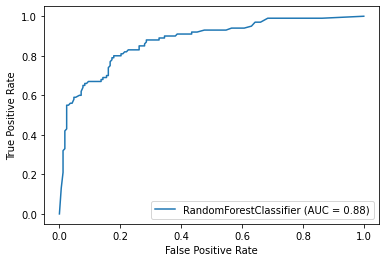

In [62]:
plot_roc_curve(model_rf,X_test,y_test)
plt.show()

# Ensembling

Ensembling the result of all 3 models by taking probability from each model and estimate the average of the probabilities. Then, the threshold value is applied by assigning survived if probability is greater than 0.5 and not survived for prob less than 0.5

In [63]:
model_prob1 = model_lr.predict_proba(test_new.drop(columns='PassengerId'))[:,1]
model_prob2 = best_rf.predict_proba(test_new.drop(columns='PassengerId'))[:,1]
model_prob3 = model_rf.predict_proba(test_new.drop(columns=['PassengerId']))[:,1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [64]:
ensemble_prob = pd.DataFrame({'PassengerId': test['PassengerId'],
                              'LogisticR': model_prob1,
                              'RF_search': model_prob2,
                              'RandomF': model_prob3})
ensemble_prob.head()

,PassengerId,LogisticR,RF_search,RandomF
0,892,0.085339,0.066174,0.038068
1,893,0.514274,0.358076,0.280000
2,894,0.115579,0.114539,0.000000
3,895,0.083551,0.367614,0.680000
4,896,0.623811,0.509545,0.570000


In [65]:
ensemble_prob['Prob'] = ensemble_prob.apply(lambda x: (x['LogisticR'] + x['RF_search'] + x['RandomF'] )/3,axis=1)
ensemble_prob['Survived'] = np.where(ensemble_prob['Prob']>= 0.5,1,0)
ensemble_prob.head()

,PassengerId,LogisticR,RF_search,RandomF,Prob,Survived
0,892,0.085339,0.066174,0.038068,0.063193,0
1,893,0.514274,0.358076,0.280000,0.384117,0
2,894,0.115579,0.114539,0.000000,0.076706,0
3,895,0.083551,0.367614,0.680000,0.377055,0
4,896,0.623811,0.509545,0.570000,0.567785,1


In [66]:
# Preparing the submission file
submission = pd.DataFrame({'PassengerId': ensemble_prob['PassengerId'],
                           'Survived': ensemble_prob['Survived']})

In [67]:
submission['Survived'].value_counts()

0    275
1    143
Name: Survived, dtype: int64

In [68]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Thank you for viewing this notebook. Please do upvote if you like it. Comment if you have doubts or concerns.